In [12]:
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import cv2

In [2]:
folder_path = 'C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/things/2024-07-16 Ugne'
file_ending = 'magnitude.txt'

#file_list = glob.glob(folder_path + '/*' + file_ending)

In [6]:
d_list = []
d_list_name = []
# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file ends with the common ending
    if filename.endswith(file_ending):
        fullf_n = folder_path+'/'+filename
        with open(fullf_n, 'r') as f:
            if f.read().strip():  # Check if the file is not empty
                file_np = np.loadtxt(fullf_n)
                d_list.append(file_np)
                d_list_name.append(fullf_n)

In [7]:
len(d_list)

27

In [196]:
d_list[0]

array([[0.00021435, 0.0002301 , 0.0002362 , ..., 0.0002196 , 0.00021335,
        0.00022485],
       [0.0002205 , 0.00021645, 0.00022805, ..., 0.00021875, 0.0002447 ,
        0.00021695],
       [0.00021975, 0.00021055, 0.0002097 , ..., 0.0002243 , 0.00023115,
        0.00022935],
       ...,
       [0.00021875, 0.00023205, 0.00020635, ..., 0.00015345, 0.00015505,
        0.0001691 ],
       [0.00022255, 0.00020425, 0.0001997 , ..., 0.0001527 , 0.00016885,
        0.00015115],
       [0.0002286 , 0.00020035, 0.00019865, ..., 0.00015525, 0.0001706 ,
        0.0001635 ]])

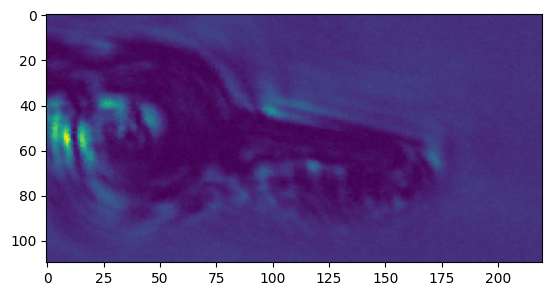

C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/things/2024-07-16 Ugne/20240716_1729_XY_r11_1_magnitude.txt


In [245]:
n = 26
plt.imshow(d_list[n])
plt.show()
print(d_list_name[n])

In [243]:
np.save('C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/raktai/r11_lq_isplaukes_npy.npy', d_list[n])

In [27]:
rfolder_path = 'C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/raktai'
afolder_path = 'C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/atsuktuvai'
test_folder_path = 'C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/test'
#file_list = glob.glob(folder_path + '/*' + file_ending)

In [44]:
r_list = []
r_list_name = []
# Loop through each file in the folder
for filename in os.listdir(rfolder_path):
    fullf_n = rfolder_path+'/'+filename
    data = np.load(fullf_n)
    max_val = data.max()
    data = data/max_val
    
    height, width = data.shape
    max_size = max(height, width)
    padding_height = max_size - height
    padding_width = max_size - width
    padded_data = np.pad(data, ((padding_height//2, padding_height//2 + padding_height%2),
                           (padding_width//2, padding_width//2 + padding_width%2)))

    padded_data = cv2.resize(padded_data, (128, 128))
    padded_data = np.expand_dims(padded_data, axis=-1)
    r_list.append(padded_data)
    r_list_name.append(fullf_n)

a_list = []
a_list_name = []
# Loop through each file in the folder
for filename in os.listdir(afolder_path):
    fullf_n = afolder_path+'/'+filename
    data = np.load(fullf_n)
    max_val = data.max()
    data = data/max_val

    height, width = data.shape
    max_size = max(height, width)
    padding_height = max_size - height
    padding_width = max_size - width
    padded_data = np.pad(data, ((padding_height//2, padding_height//2 + padding_height%2),
                           (padding_width//2, padding_width//2 + padding_width%2)))

    padded_data = cv2.resize(padded_data, (128, 128))
    padded_data = np.expand_dims(padded_data, axis=-1)
    a_list.append(padded_data)
    a_list_name.append(fullf_n)

test_list = []
test_list_name = []
test_lab = []
lab = 0
# Loop through each file in the folder
for filename in os.listdir(test_folder_path):
    fullf_n = test_folder_path+'/'+filename
    data = np.load(fullf_n)
    max_val = data.max()
    data = data/max_val
    
    height, width = data.shape
    max_size = max(height, width)
    padding_height = max_size - height
    padding_width = max_size - width
    padded_data = np.pad(data, ((padding_height//2, padding_height//2 + padding_height%2),
                           (padding_width//2, padding_width//2 + padding_width%2)))

    padded_data = cv2.resize(padded_data, (128, 128))
    padded_data = np.expand_dims(padded_data, axis=-1)
    test_list.append(padded_data)
    test_list_name.append(fullf_n)

    if(filename[0] == 'r'):
        lab = 0
    else: 
        lab = 1
    test_lab.append(lab)
    print(lab)

1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [30]:
print(r_list[0].shape)
print(len(r_list))

(128, 128, 1)
26


In [31]:
#a_list_lab = np.full(shape=11, fill_value=1)
#r_list_lab = np.full(shape=26, fill_value=0)

In [32]:
lab = np.concatenate((r_list_lab, a_list_lab))
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
both_ra = r_list + a_list
len(both_ra)

arr_both_ra = np.array(both_ra)
arr_lab = np.array(lab)

arr_test_list = np.array(test_list)
arr_test_lab = np.array(test_lab)

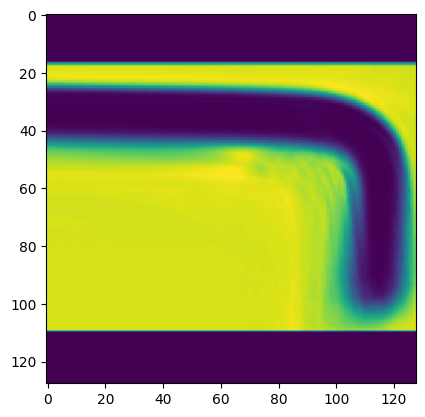

1


In [48]:
n = 2
plt.imshow(arr_test_list[n])
plt.show()
print(arr_test_lab[n])

1


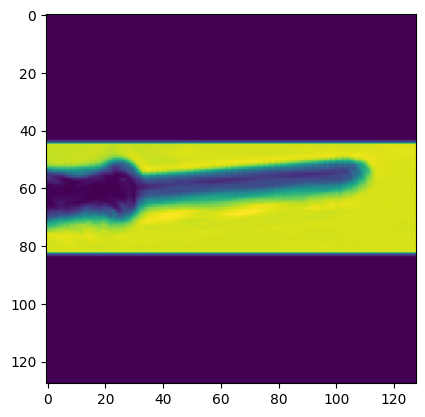

1


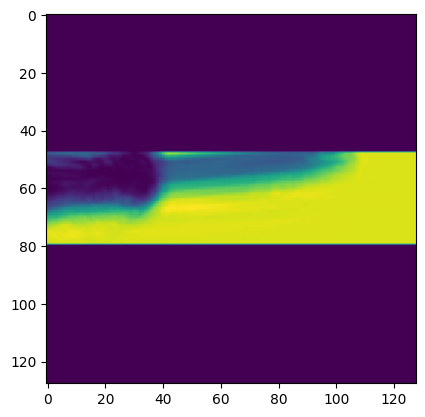

1


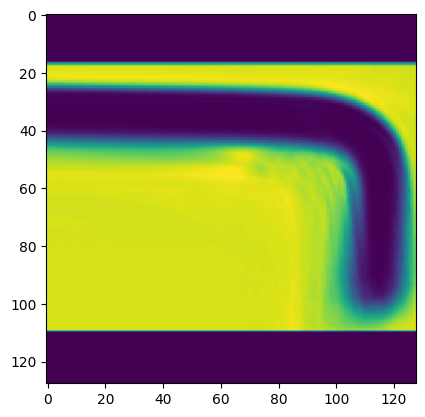

1


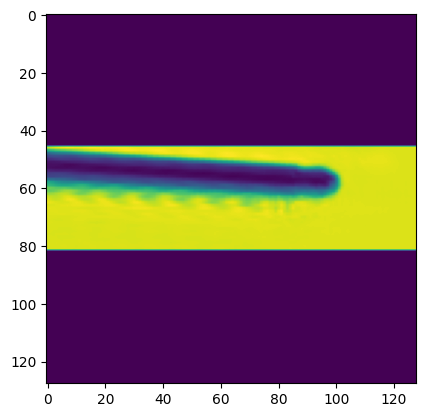

0


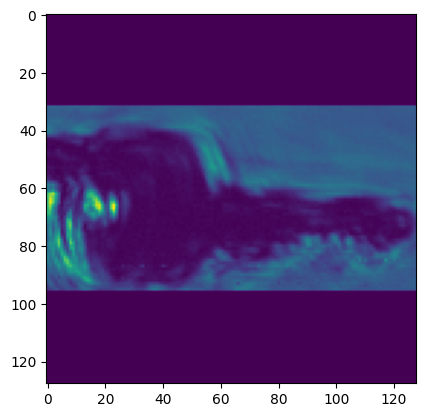

0


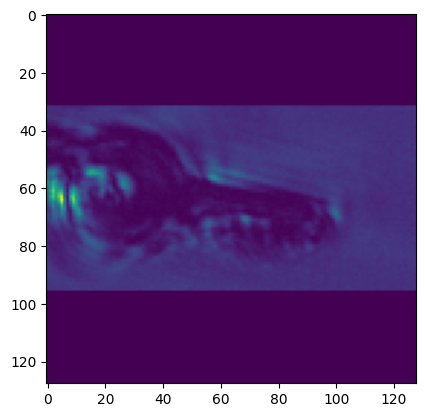

0


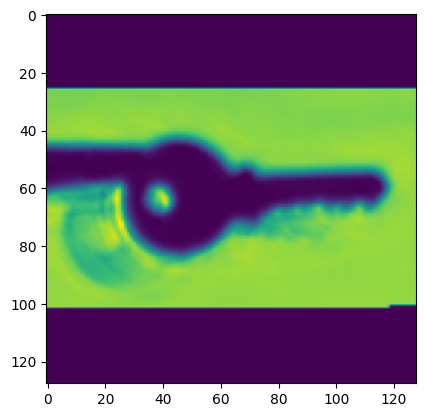

0


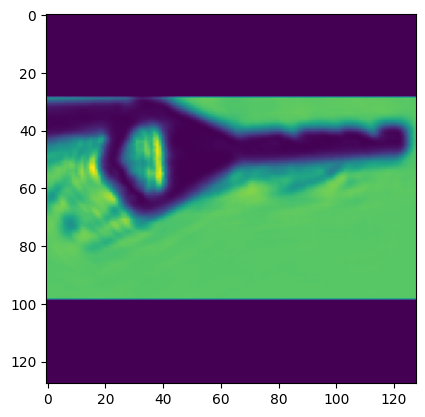

0


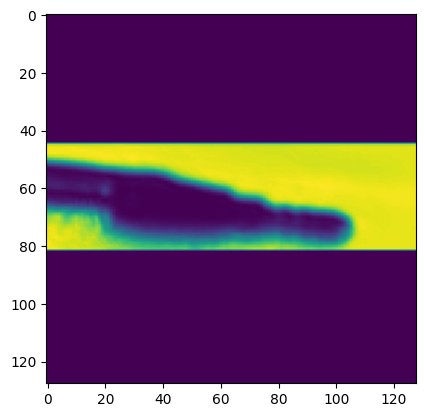

0


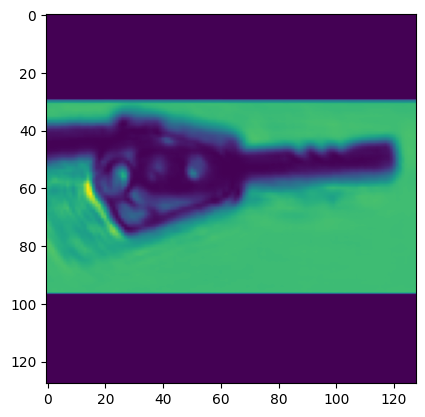

0


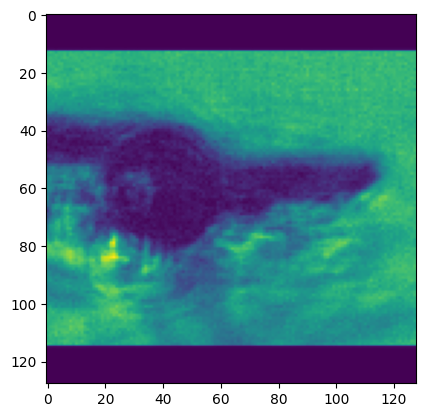

0


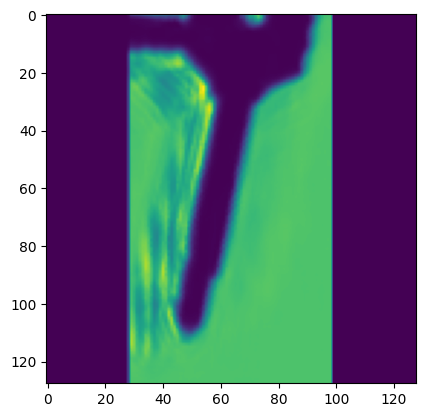

0


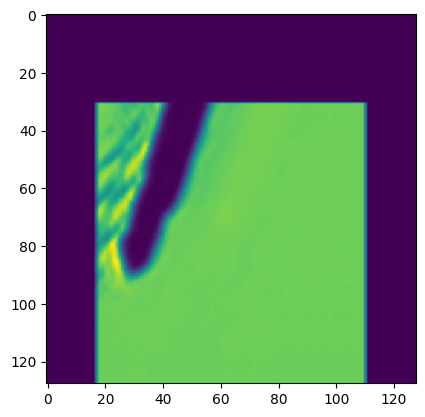

0


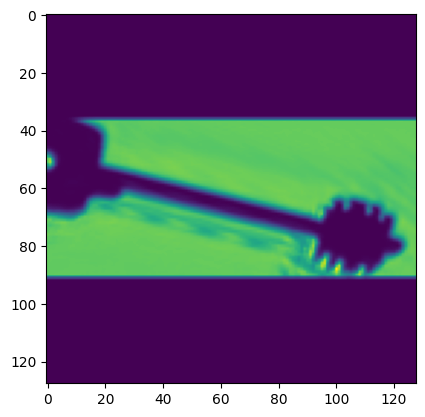

0


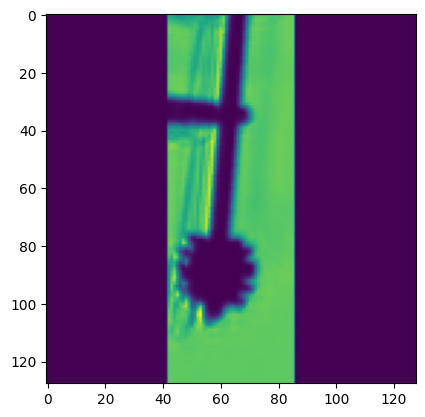

0


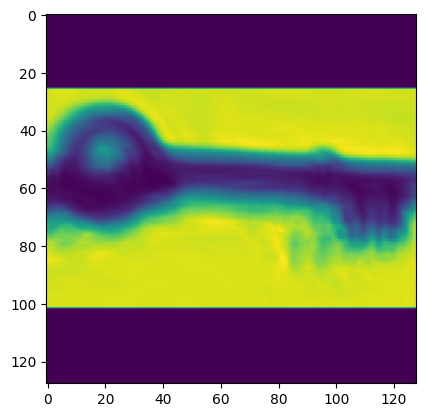

0


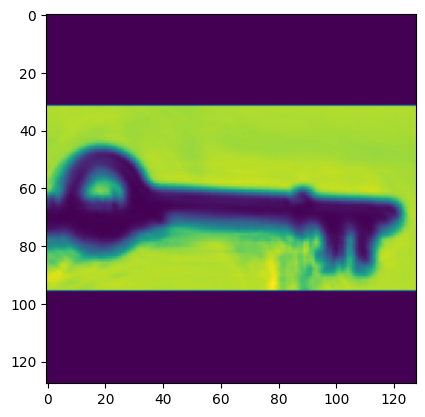

0


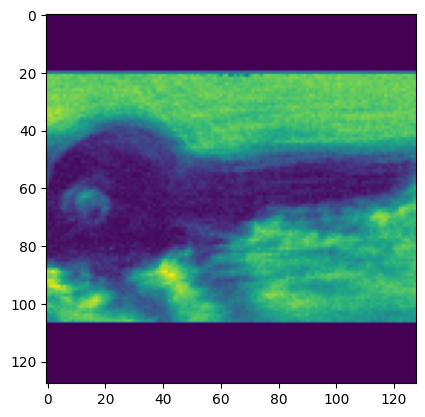

0


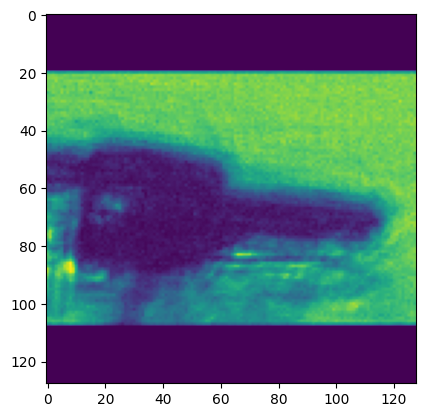

0


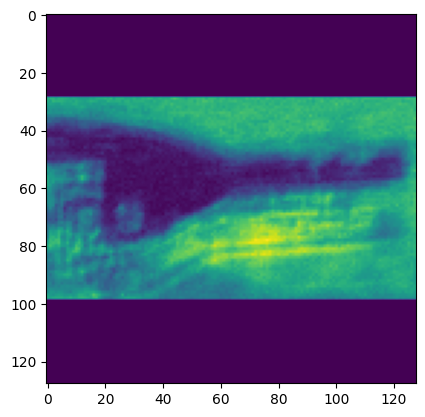

0


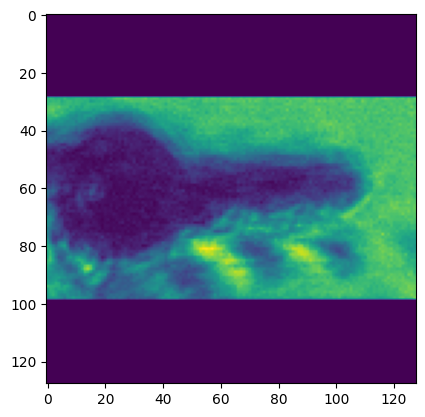

0


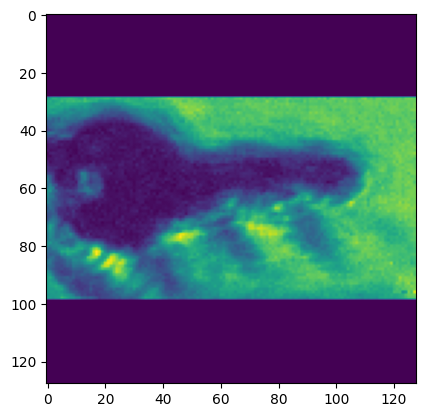

0


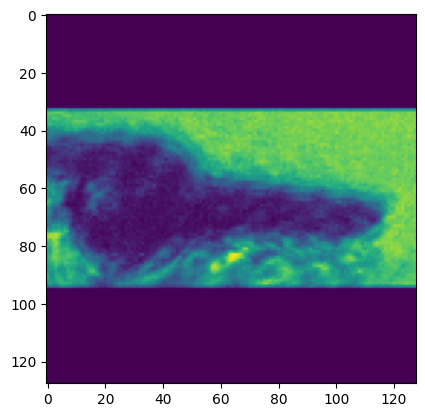

0


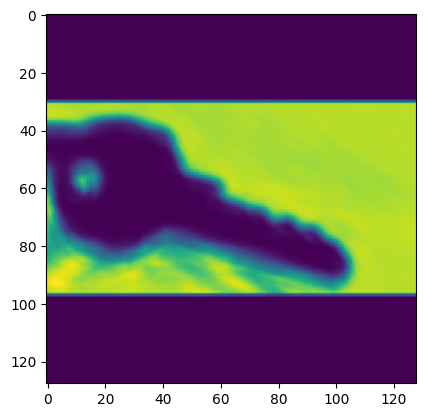

0


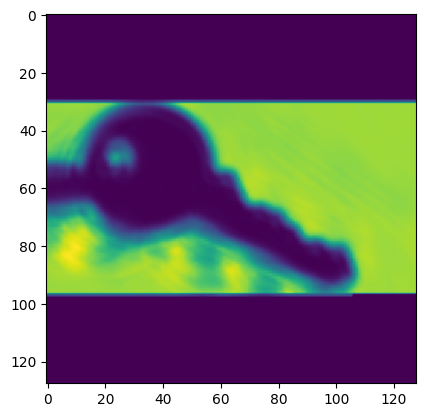

0


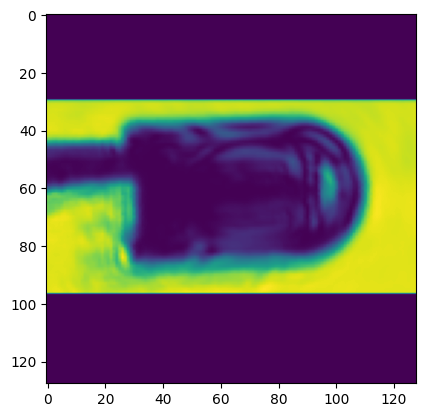

0


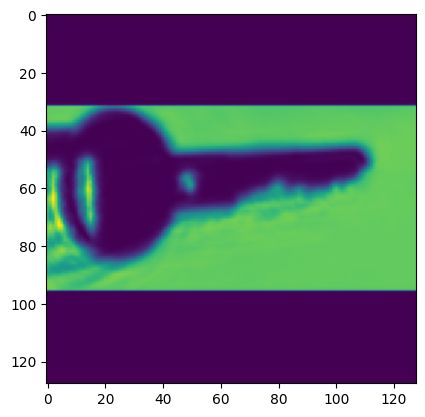

In [49]:
i = 0
for element in arr_test_list:
    print(arr_test_lab[i])
    plt.imshow(arr_test_list[i])
    plt.show()
    i=i+1

In [35]:
np.save('C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/pics.npy', arr_both_ra)
np.save('C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/labs.npy', arr_lab)

In [50]:
np.save('C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/test_pics.npy', arr_test_list)
np.save('C:/THINGS/SVARBU/wur maybe/uni/year5/darbas/vasara/test_labs.npy', arr_test_lab)

In [113]:
import tensorflow as tf
dataset = tf.data.Dataset.from_generator(lambda: both_ra, tf.float32, output_shapes=None)
label_dataset = tf.data.Dataset.from_tensor_slices(lab)

In [114]:
dataset

<_FlatMapDataset element_spec=TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)>

0


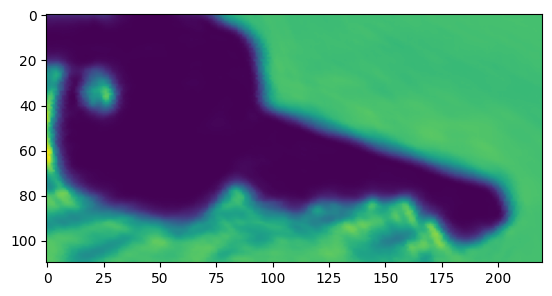

0


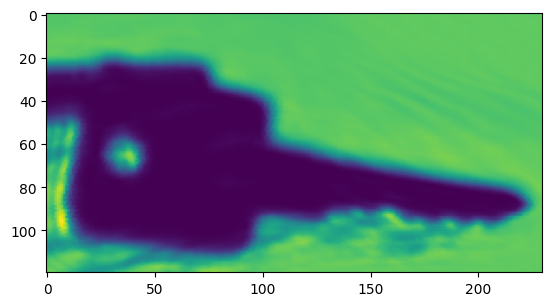

0


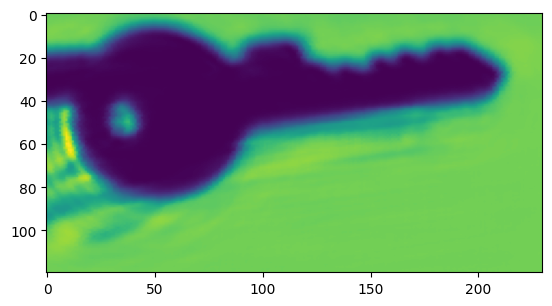

0


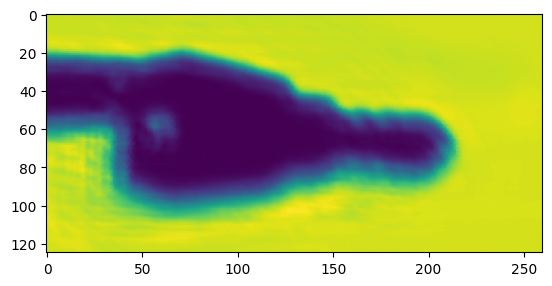

0


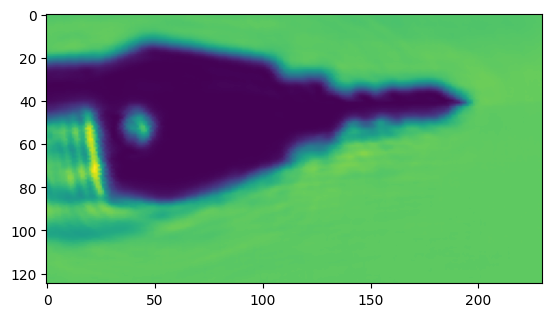

0


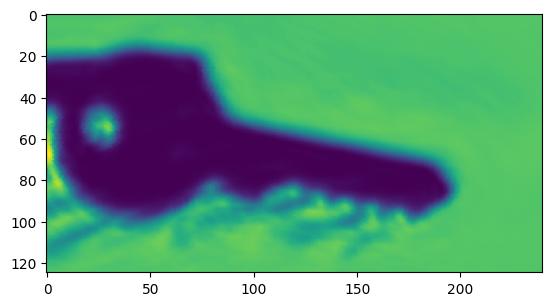

0


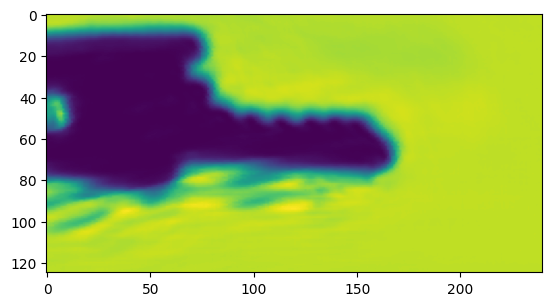

0


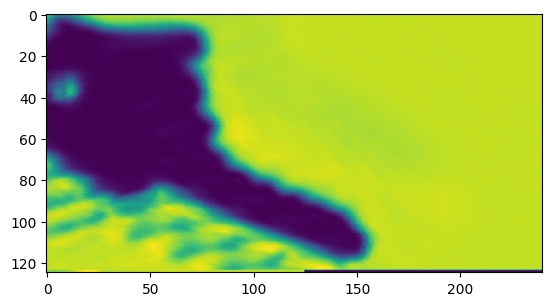

0


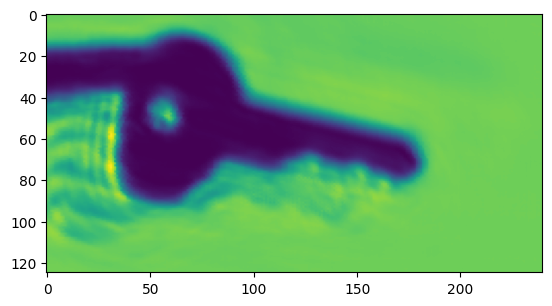

0


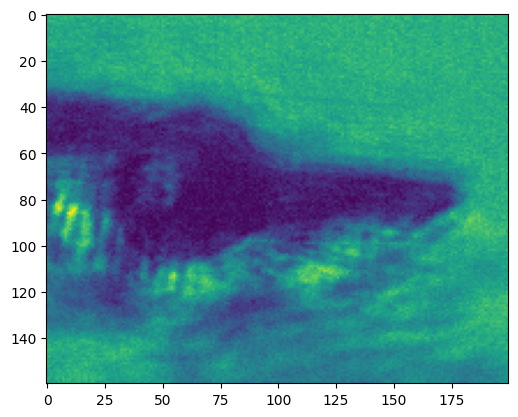

0


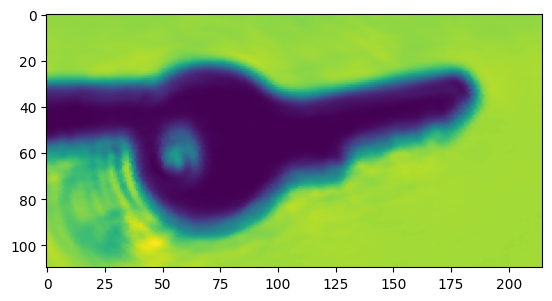

0


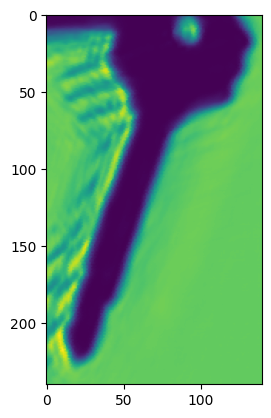

0


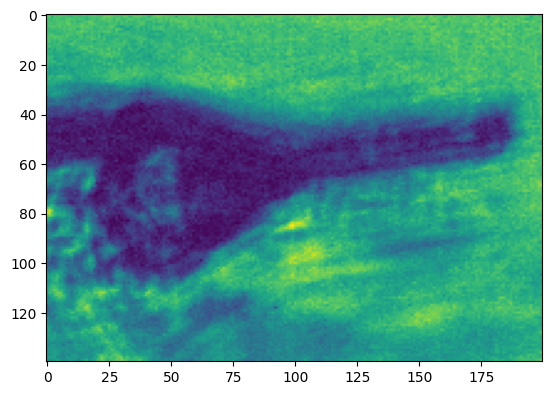

0


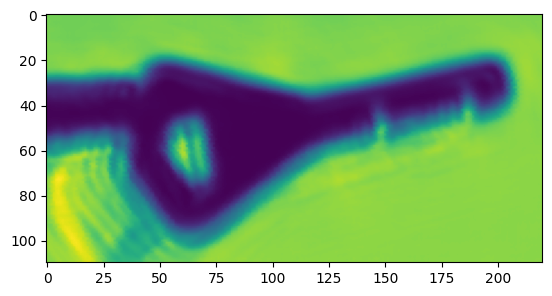

0


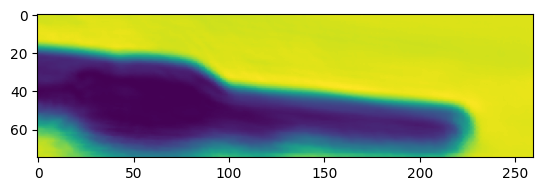

0


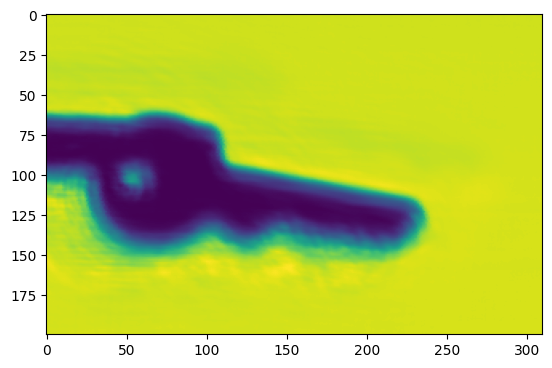

0


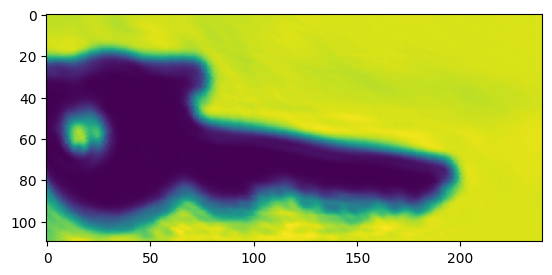

0


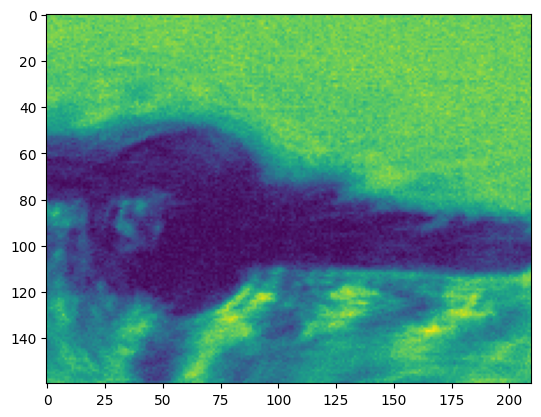

0


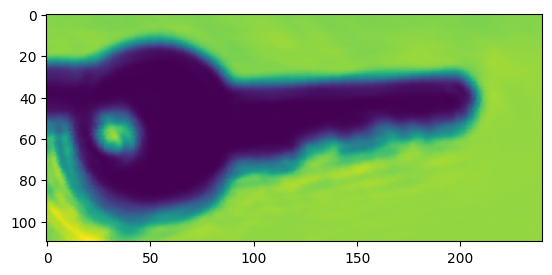

0


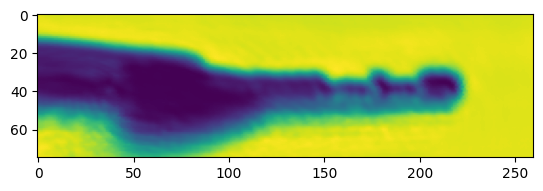

0


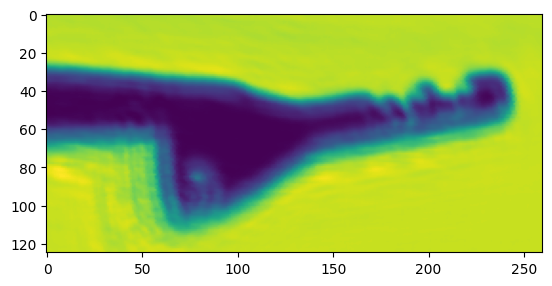

0


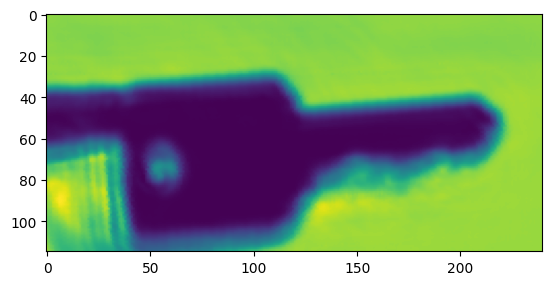

0


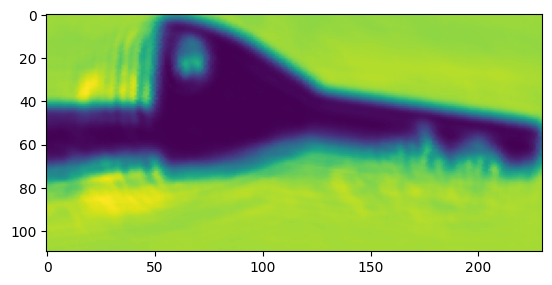

0


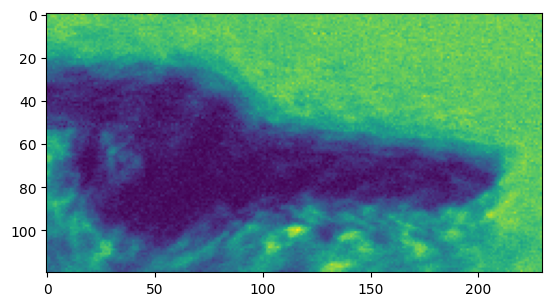

0


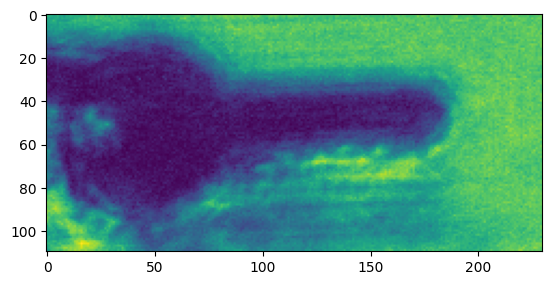

0


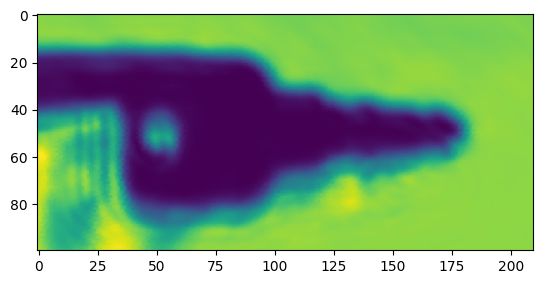

1


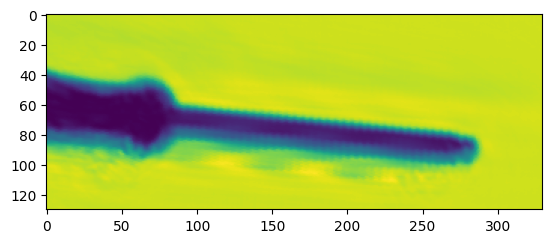

1


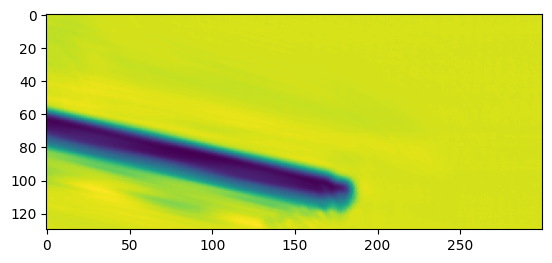

1


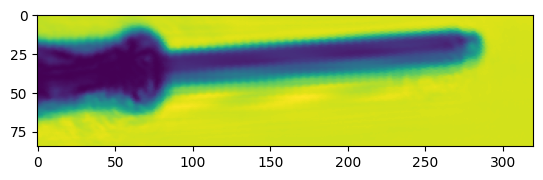

1


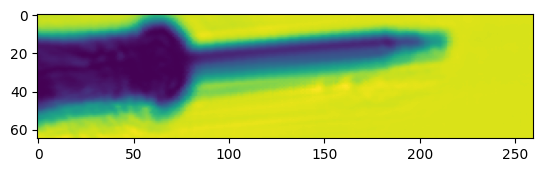

1


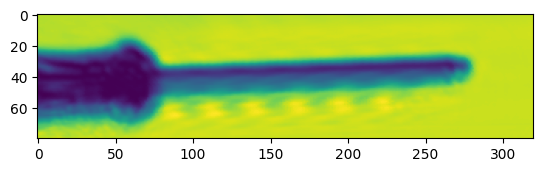

1


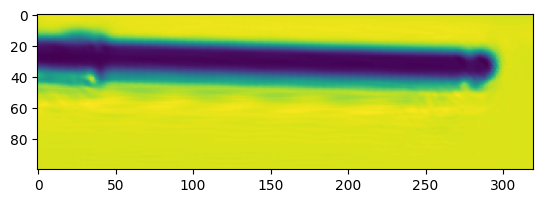

1


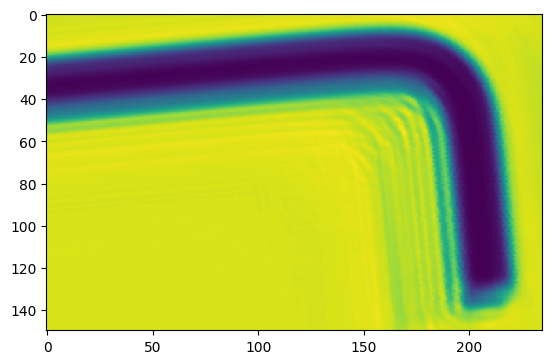

1


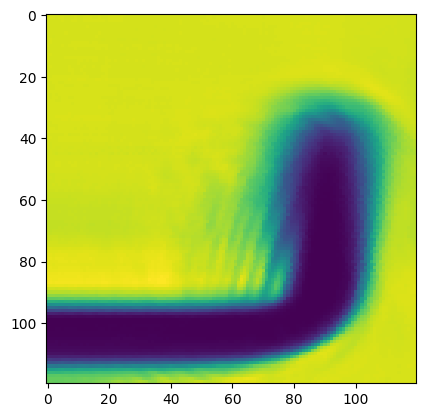

1


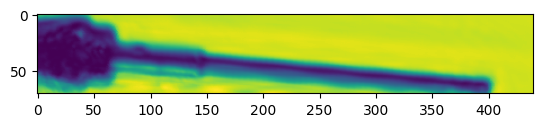

1


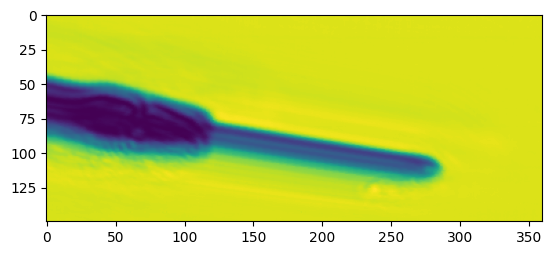

1


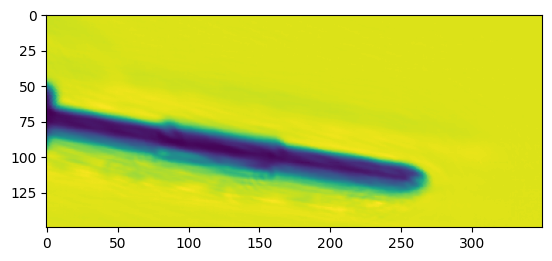

In [115]:
i = 0
for element in dataset:
    print(lab[i])
    numpy_array = element.numpy()
    plt.imshow(numpy_array)
    plt.show()
    i=i+1

In [116]:
full_dataset = tf.data.Dataset.zip((dataset, label_dataset))

In [117]:
full_dataset = full_dataset.shuffle(buffer_size=100, reshuffle_each_iteration=True)
full_dataset = full_dataset.batch(batch_size=4)

In [121]:
def make_model():
    inputs = tf.keras.Input(shape = (None, None, 1))

    x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='elu')(inputs)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='elu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    
    outputs = tf.keras.layers.Dense(2)(x)
    return tf.keras.Model(inputs, outputs)

    
model = make_model()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [122]:
epochs=25
history = model.fit(
  full_dataset,
  epochs=epochs
)

Epoch 1/25


ValueError: as_list() is not defined on an unknown TensorShape.